# Installing  Packages 

In [107]:

import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
import csv
import tweepy
import datetime
import seaborn as sb



# 1. Data Gathering

# Reading file twitter-archive-enhanced

In [108]:
# Read file twitter-archive-enhanced
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Reading image predictions
tsv_file = open('image_predictions.tsv')

read_tsv = csv.reader(tsv_file, delimiter="\t")




In [109]:
# Reading image predictions which hosted on Udacity's servers and should be downloaded programmatically using the Requests library 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as f:
    f.write(response.content)

In [110]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Use Twitter API and Python's Tweepy library 


I can not  use twitter API because my account not approved.<br/>

below is the code to extract API.

#create an API object e to gather Twitter data.
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


# collecting data using API  

collected =[]
not_collected = [] # to avoid error/exception messages

with open('tweet_json.txt', 'w') as file:
    for tweet_id in list(tw_archive['tweet_id']):
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            collected.append(tweet_id)
        except Exception as e:
            not_collected.append(tweet_id)

# Reading Josn File

I gather data from JSON which providing by Udacity

In [111]:
#Reading JSON content as pandas dataframe
tweet_status = pd.read_json('tweet_json.txt', lines = True)

In [112]:
tweet_status.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [113]:
#Save dataframe in csv file
tweet_status.to_csv('tweet_status.csv')

In [114]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [115]:
# Select multiple columns 
select_tweet = tweet_status[['id', 'retweet_count', 'favorite_count', 'display_text_range']]
select_tweet.head()

,id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


# Gathering Summary

We have three files to  gather data. The first one from csv file, the saconde one from the tsv file and  third one read data from josn file. 

# Data  Assessing


# 1) Twitter archive data:

In [116]:
tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [117]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [118]:
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [119]:
tw_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [120]:
# check if there is  Null  value

tw_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [121]:
# check for the dog's name 
tw_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Aja          1
Fido         1
Marty        1
Jersey       1
Nida         1
Name: name, Length: 957, dtype: int64

In [122]:
# check for the dog's name written style
tw_archive.name.str.istitle().value_counts()

True     2241
False     115
Name: name, dtype: int64

In [123]:
# check for dog's name written as lowercase(bad style)
lowers = tw_archive.name.loc[tw_archive.name.str.islower()].unique()
lowers

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [124]:
# counts doggo
tw_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [125]:
# counts floofer
tw_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [126]:
# counts pupper
tw_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [127]:
# counts puppo
tw_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

There are multiple value in dog_stage(doggo,floofer,pupper,puppo)

In [128]:
tw_archive[(tw_archive.doggo != 'None') & (tw_archive.floofer != 'None')].shape



(1, 17)

In [129]:
tw_archive[(tw_archive.doggo != 'None') & (tw_archive.pupper != 'None')].shape

(12, 17)

In [130]:
tw_archive[(tw_archive.doggo != 'None') & (tw_archive.puppo != 'None')].shape


(1, 17)

In [131]:
# counts the not Null  value in retweeted _status  
tw_archive.retweeted_status_id.notnull().sum()

181

In [132]:
# Check number of nuul records in the in_reply_to_status_id (its representing if the tweet was original or a reply to another tweet )
tw_archive.in_reply_to_status_id.isnull().sum()

2278

In [133]:
# counts the not Null  value in reply_to_status
tw_archive.in_reply_to_status_id.notnull().sum()

78

In [134]:
# check for source column
tw_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [135]:
# counts rating_numerator
tw_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [136]:
# counts rating_denominator
tw_archive.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [137]:
# Check number of  rating_denominator =!10 in data frame
len(tw_archive[tw_archive['rating_denominator'] != 10 ])

23

In [138]:
# Check number of  rating_denominator =0 in data frame
len(tw_archive[tw_archive['rating_denominator'] == 0 ])

1

In [139]:
# Check number of  rating_numerator =0 in data frame
len(tw_archive[tw_archive['rating_numerator'] ==0 ])

2

In [140]:
# Check number of  rating_numerator >20 in data frame
len(tw_archive[tw_archive['rating_numerator'] >20 ])

24

In [141]:
# Check number of duplicated records in the data frame.

sum(tw_archive.duplicated())


0

In [142]:
# Check the tweet_text value 
list(tw_archive.text)

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps:

# Quality issues

1-The column **(in_reply_to_status_id)** representing if the tweet was original or a reply to another tweet (You only want original ratings (no retweets) that have images.).Drop all the rows in (in_reply_to_user_id) has a value that is not NaN. <br/>

2- Drop some columns like **( in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp,expanded_urls)** they have missing data :<br/>
in_reply_to_status_id, in_reply_to_user_id : 78 instead of 2356<br/>
retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp 181 instead of 2356<br/>
expanded_urls : 2297 instead of 2356
<br/> and not  helpful in the analysis.<br/>

4- There are **invalid dog names** like (a, an and the) and with bad style non-capitalized letter .Update all the nam which are non-capitalized names  and "None"  to Null.<br/>
5-Rename the columns to readable name like :  **(name) to (dog_name) , (timestamp) to (tweet_timestamp), (text) to (tweet_text)**.<br/>
6-Incorrect dtype for **(tweet_id), (timestamp), (source), (rating_numerator) and (rating_denominator)**.<br/>

7- The ratings probably aren't all correct .There are **(23)** cases which **denominator of rating (!= 10) , (1) denominator  of rating (==0 ), (2) numerator  of rating (==0 ) and numerator  of rating (>20) **. So, drop all of these data <br/>

8- The tweet_text value have the **rating number**  with the text .So,  we need to delete the rating number from text.<br/>
9- The source column etxract the important part ( iPhone, Twitter, Vine, TweetDeck)
 


_____________________________________________________________________

# Tidiness Issues


1- Add column of dog_stages (i.e. doggo, floofer, pupper, and puppo), and drop  the column(doggo, floofer, pupper, and puppo) <br/>
2- Add column of rating_number (rating_numerator/rating_denominator), and drop the column (rating_numerator,rating_denominator). <br/>

_______________________________________________________________________

# 2) image predictions

In [143]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [144]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [145]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [146]:
#check null value
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

# Quality Issues



1-Change the type of column tweet_id to str object 

# Tidiness Issues

1-Chagne the columns(p1,p2,p3,p1_conf,p2_conf,p3_conf)to to readable name.

2-Drop the columns( jpg url,img_num) no need for them 

__________________________________________________________________________________________

# 3)tweet_status

In [147]:
tweet_status

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [148]:
tweet_status.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


# Quality Issues


1-Column id is saved as int datatype instead of object datatype & rename as tweet_id

# Tidiness Issues

1-Drop unneeded columns

__________________________________________________________________________________________

# Data  Cleaning

In [149]:
# make a copy of the datasets
tw_archive_clean = tw_archive.copy()
image_predictions_clean =image_predictions.copy()
tweet_status_clean =tweet_status.copy()

**Quality issues**
(twitter_archive)

**Define**

1-The column (in_reply_to_status_id) representing if the tweet was original or a reply to another tweet (**You only want original ratings (no retweets) that have images.**).And the column (retweeted_status_id)representing the retweets. Drop all the rows in (in_reply_to_status_id and retweeted_status_id) has a value that is not NaN. 

**Code**

In [150]:
#drop not NaN values (in_reply_to_status_id) that representing if the tweet was original or a reply to another tweet
drop_reply = tw_archive_clean[pd.notnull(tw_archive_clean['retweeted_status_id'])].index

#drop not NaN values (in_reply_to_user_id) that representing if the tweet was original or a reply to another tweet
drop_rew =tw_archive_clean[pd.notnull(tw_archive_clean['in_reply_to_status_id'])].index

tw_archive_clean.drop(index=drop_reply, inplace=True)

tw_archive_clean.drop(index=drop_rew, inplace=True)

**Test**

In [151]:
tw_archive_clean .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

**Define**

2-Drop columns which have missing data and not helpful in anlysis like (in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp) 

In [152]:

# drop columns which have missing data and not helpful in anlysis
xcolumns = ['in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls']
tw_archive_clean = tw_archive_clean.drop(columns = xcolumns, axis=1)

**Test**

In [153]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   timestamp              2097 non-null   object 
 3   source                 2097 non-null   object 
 4   text                   2097 non-null   object 
 5   rating_numerator       2097 non-null   int64  
 6   rating_denominator     2097 non-null   int64  
 7   name                   2097 non-null   object 
 8   doggo                  2097 non-null   object 
 9   floofer                2097 non-null   object 
 10  pupper                 2097 non-null   object 
 11  puppo                  2097 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 213.0+ KB


**Define**

3- There are **invalid dog names** like (a, an and the) and with bad style non-capitalized letter .Update all the nam which are non-capitalized names  and "None"  to Null.



**Code**

In [154]:
# converted lower names to np.nan
lowers = tw_archive_clean.name.str.islower()
tw_archive_clean.loc[lowers,'name'] = 'None'
# make all values titled
tw_archive_clean.name = tw_archive_clean.name.apply(lambda x: x.title())
# replace 'None' with np.nan values
tw_archive_clean.name.replace('None', np.nan, inplace= True)


**Test**

In [155]:
tw_archive_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2097, dtype: object

**Define**

4-Rename the columns to readable name like :  **(name) to (dog_name) , (timestamp) to (tweet_timestamp), (text) to (tweet_text)**

**Code**

In [156]:

new_names = {'timestamp': 'tweet_timestamp', 'text': 'tweet_text', 'name': 'dog_name'}


tw_archive_clean.rename(columns=new_names, inplace=True)

**Test**

In [157]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   tweet_timestamp        2097 non-null   object 
 3   source                 2097 non-null   object 
 4   tweet_text             2097 non-null   object 
 5   rating_numerator       2097 non-null   int64  
 6   rating_denominator     2097 non-null   int64  
 7   dog_name               1390 non-null   object 
 8   doggo                  2097 non-null   object 
 9   floofer                2097 non-null   object 
 10  pupper                 2097 non-null   object 
 11  puppo                  2097 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 213.0+ KB


**Define**

5-Incorrect dtype for **(tweet_id), (timestamp), (source), (rating_numerator) and (rating_denominator)**.


**Code**

In [158]:
tw_archive_clean['tweet_id'] = tw_archive_clean['tweet_id'].astype(str)
tw_archive_clean['tweet_timestamp'] = pd.to_datetime(tw_archive_clean.tweet_timestamp)
tw_archive_clean['source'] = tw_archive_clean['source'].astype('object')
tw_archive_clean['rating_numerator'] = tw_archive_clean['rating_numerator'].astype(object)
tw_archive_clean['rating_denominator'] = tw_archive_clean['rating_denominator'].astype(object)


**Test**

In [159]:
tw_archive_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
tweet_timestamp          datetime64[ns, UTC]
source                                object
tweet_text                            object
rating_numerator                      object
rating_denominator                    object
dog_name                              object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

**Defin**

6- drop cases which have denominator of rating (!= 10), denominator  of rating (==0 )  numerator  of rating (==0 )and numerator  of rating (>20 ).


**Code**

In [160]:
#drop invalid value in rating_dominator and numerator
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.rating_denominator != 10].index, inplace = True)
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.rating_denominator == 0].index, inplace = True)
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.rating_numerator == 0].index, inplace = True)
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.rating_numerator > 20].index, inplace = True)

**Test**

In [161]:
rating_d =tw_archive_clean.rating_denominator.value_counts()
print(rating_d)
rating_n =tw_archive_clean.rating_numerator.value_counts()
print(rating_n)

10    2074
Name: rating_denominator, dtype: int64
12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
Name: rating_numerator, dtype: int64


**Define**


7-The Tweet_text have rating number with the text . lets delet the number from it 

**code**

In [162]:

tw_archive_clean['tweet_text'] = tw_archive_clean['tweet_text'].str.replace('\d+', '')



https://www.codegrepper.com/code-examples/python/how+to+remove+numbers+from+string+in+python+pandas

**Test**

In [163]:
tw_archive_clean['tweet_text'].iloc[420]

"This is Waffles. He's concerned that the dandruff shampoo he just bought is faulty. / tragic af https://t.co/BCBqUUh"

**Dfine**

8-Replace  values in source  to (iPhone, Twitter, Vine, TweetDeck)

**Code**

In [164]:
# use Replace to edit the value in source
tw_archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
tw_archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter', inplace=True)
tw_archive_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
tw_archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)

**Test**

In [165]:
tw_archive_clean.source.value_counts()

iPhone       1942
Vine           91
Twitter        31
Tweetdeck      10
Name: source, dtype: int64

**Tidiness Issues** (tw_archive)

**Define**

1-Add column of dog_stages (i.e. doggo, floofer, pupper, and puppo):<br/>
a-some of column has multi value so we need the replace these values by none.
<br/>
b-drop the column(doggo, floofer, pupper, and puppo).<br/>
c- update the dog_stages column to category type.<br/>


**Code**

In [166]:

#check for multi value 

tw_archive_clean.loc[tw_archive_clean.doggo == 'None', 'doggo'] = ''
tw_archive_clean.loc[tw_archive_clean.floofer == 'None', 'floofer'] = ''
tw_archive_clean.loc[tw_archive_clean.pupper == 'None', 'pupper'] = ''
tw_archive_clean.loc[tw_archive_clean.puppo == 'None', 'puppo'] = ''

tw_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1739
1,,,,puppo,23
2,,,pupper,,220
3,,floofer,,,9
4,doggo,,,,72
5,doggo,,,puppo,1
6,doggo,,pupper,,9
7,doggo,floofer,,,1


In [167]:
# add acolumn (dog_stage) and make a marge between them(dog_stage) 
tw_archive_clean['dog_stage'] = tw_archive_clean.doggo + tw_archive_clean.floofer + tw_archive_clean.pupper + tw_archive_clean.puppo
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

tw_archive_clean.loc[tw_archive_clean.dog_stage == '', 'dog_stage'] = 'None'

In [168]:
#replace (none) if the doge_stage has multi values
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggo,pupper', 'dog_stage'] = 'None'
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggo,puppo', 'dog_stage'] = 'None'
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggo,floofer', 'dog_stage'] = 'None'

In [169]:
#update the dog_stages column to category type
tw_archive_clean.dog_stage = tw_archive_clean.dog_stage.astype('category')

In [170]:

#drop the culomn (doggo, floofer,pupper,puppo) no need for them 
tw_archive_clean.drop(['doggo', 'floofer','pupper','puppo'], axis = 1,inplace = True) 

**Test**

In [171]:
tw_archive_clean.dog_stage.value_counts()

None       1750
pupper      220
doggo        72
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [172]:
list(tw_archive_clean.dog_stage)

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'doggo',
 'None',
 'None',
 'puppo',
 'None',
 'puppo',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'doggo',
 'None',
 'None',
 'floofer',
 'None',
 'None',
 'pupper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'puppo',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'None',
 'puppo',
 'None',
 'pupper',
 'doggo',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'doggo',
 'doggo',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'doggo',
 'None',
 'None',
 'None',
 

In [173]:
# check for the data columns and datatype
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2074 non-null   object             
 1   in_reply_to_status_id  0 non-null      float64            
 2   tweet_timestamp        2074 non-null   datetime64[ns, UTC]
 3   source                 2074 non-null   object             
 4   tweet_text             2074 non-null   object             
 5   rating_numerator       2074 non-null   object             
 6   rating_denominator     2074 non-null   object             
 7   dog_name               1384 non-null   object             
 8   dog_stage              2074 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 148.0+ KB


**Defin**

2-Add column of rating_number (rating_numerator/rating_denominator), and drop the column (rating_numerator,rating_denominator).

**Code**

In [174]:
#divide the rating_numerator / rating_denominator and then * by 10 and save it in dog_rating column
tw_archive_clean['dog_rating'] = 10 * tw_archive_clean.rating_numerator / tw_archive_clean.rating_denominator
#drop the columns rating_numerator & rating_denominator column
tw_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

**Test**

In [175]:
# check for values in the dog_rating column
tw_archive_clean.dog_rating.value_counts()

12.0    486
10.0    436
11.0    413
13.0    287
9.0     152
8.0      98
7.0      51
14.0     38
5.0      34
6.0      32
3.0      19
4.0      15
2.0       9
1.0       4
Name: dog_rating, dtype: int64

In [176]:
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,tweet_timestamp,source,tweet_text,dog_name,dog_stage,dog_rating
0,892420643555336193,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,13
1,892177421306343426,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,Tilly,None,13
2,891815181378084864,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,12
3,891689557279858688,NaN,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,Darla,None,13
4,891327558926688256,NaN,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,Franklin,None,12


**Tidiness Issues**(image_predictions)


**Define**

1- Define column prediction and confidence_level by append p# and p#_conf requested by p#_dog. After thah drop no need columns.

**Code**

In [177]:
predictions = []
confidence_level = []


def pre_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])

    else:
        predictions.append('NaN')
        confidence_level.append(0)

image_predictions_clean.apply(pre_func, axis=1)
image_predictions_clean['prediction'] = predictions
image_predictions_clean['confidence_level'] = confidence_level
#drop column (p1,p2,p3,p1_conf,p2_conf,p3_conf,p1_dog,p2_dog,p3_dog)
image_predictions_clean = image_predictions_clean.drop([ 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)



**Test**

In [178]:
image_predictions_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   jpg_url           2075 non-null   object 
 2   img_num           2075 non-null   int64  
 3   prediction        2075 non-null   object 
 4   confidence_level  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB



**Define**

2- Drop no need column like(jpg_url and img_num)

**Code**

In [179]:
# Remove (jpg_url and img_num) columns as index base 
image_predictions_clean.drop(['jpg_url','img_num'],axis=1,inplace=True)

**Test**

In [180]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   prediction        2075 non-null   object 
 2   confidence_level  2075 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.8+ KB


**Quality issues**
(image_predictions)


**Define**

1- Incorrect dtype of (tweet_id) change it to str by using .astype

**Code**

In [181]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)


**Test**

In [182]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   object 
 1   prediction        2075 non-null   object 
 2   confidence_level  2075 non-null   float64
dtypes: float64(1), object(2)
memory usage: 48.8+ KB


**Quality issues**(tweet_status)

**Define**

1-Rename and change  dtype of (id) to (tweet_id)

**Code**

In [183]:
tweet_status_clean['id'] = tweet_status_clean['id'].astype(str)
tweet_status_clean.rename(columns = {'id':'tweet_id'}, inplace=True)



**Test**

In [184]:
tweet_status_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

**Tidiness Issues**(tweet_status)

**Define**

1-Drop no need columns

**Code**

In [185]:

                    
tweet_status_clean.drop(['id_str','full_text','truncated','entities','extended_entities','source',
                     'created_at','in_reply_to_status_id','in_reply_to_status_id_str',
                     'in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name',
                     'user','geo','coordinates','place','contributors','is_quote_status','favorited',
                     'retweeted','possibly_sensitive','possibly_sensitive_appealable','lang','retweeted_status','quoted_status_id','quoted_status_id_str',
                     'quoted_status' ],axis=1,inplace=True)
                 
           

**Test**

In [186]:
tweet_status_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   object
 1   display_text_range  2354 non-null   object
 2   retweet_count       2354 non-null   int64 
 3   favorite_count      2354 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


# Merging dataframes to create a master dataframe (Tidiness Issues)

In [187]:

# Merging dataframes to create a master dataframe 

result = pd.merge(tw_archive_clean, tweet_status_clean, how='inner', on=['tweet_id'])

In [188]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2074 non-null   object             
 1   in_reply_to_status_id  0 non-null      float64            
 2   tweet_timestamp        2074 non-null   datetime64[ns, UTC]
 3   source                 2074 non-null   object             
 4   tweet_text             2074 non-null   object             
 5   dog_name               1384 non-null   object             
 6   dog_stage              2074 non-null   category           
 7   dog_rating             2074 non-null   object             
 8   display_text_range     2074 non-null   object             
 9   retweet_count          2074 non-null   int64              
 10  favorite_count         2074 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int6

In [189]:

df = pd.merge(result, image_predictions_clean, how='inner', on=['tweet_id'])
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

df = pd.read_csv('twitter_archive_master.csv')

**Dataset has successfully stored in twitter_archive_master.csv**



In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1948 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   tweet_timestamp        1948 non-null   object 
 3   source                 1948 non-null   object 
 4   tweet_text             1948 non-null   object 
 5   dog_name               1343 non-null   object 
 6   dog_stage              1948 non-null   object 
 7   dog_rating             1948 non-null   float64
 8   display_text_range     1948 non-null   object 
 9   retweet_count          1948 non-null   int64  
 10  favorite_count         1948 non-null   int64  
 11  prediction             1646 non-null   object 
 12  confidence_level       1948 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 198.0+ KB


In [191]:
df.tail()

,tweet_id,in_reply_to_status_id,tweet_timestamp,source,tweet_text,dog_name,dog_stage,dog_rating,display_text_range,retweet_count,favorite_count,prediction,confidence_level
1943,666049248165822465,NaN,2015-11-16 00:24:50+00:00,iPhone,Here we have a st generation vulpix. Enjoys s...,NaN,None,5.0,"[0, 120]",41,111,miniature_pinscher,0.560311
1944,666044226329800704,NaN,2015-11-16 00:04:52+00:00,iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,None,6.0,"[0, 137]",147,311,Rhodesian_ridgeback,0.408143
1945,666033412701032449,NaN,2015-11-15 23:21:54+00:00,iPhone,Here is a very happy pup. Big fan of well-main...,NaN,None,9.0,"[0, 130]",47,128,German_shepherd,0.596461
1946,666029285002620928,NaN,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,None,7.0,"[0, 139]",48,132,redbone,0.506826
1947,666020888022790149,NaN,2015-11-15 22:32:08+00:00,iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,None,8.0,"[0, 131]",532,2535,Welsh_springer_spaniel,0.465074


______________________________________________________________________________

# Analyzing and Visualizing Data


# what is the most source  the tweets?

In [192]:
tweet_sources = df.groupby('source').count()[['tweet_id']]

tweet_sources['source_percentage'] = tweet_sources.tweet_id / tweet_sources.tweet_id.sum() * 100

tweet_sources['source_percentage']

source
Tweetdeck     0.513347
Twitter       1.437372
iPhone       98.049281
Name: source_percentage, dtype: float64

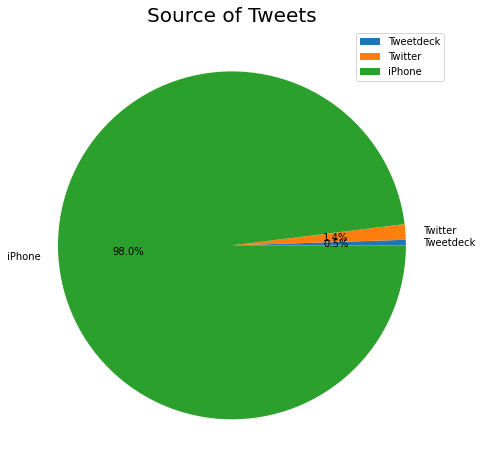

In [193]:

labels = ['Tweetdeck', 'Twitter', 'iPhone']
tweet_sources['source_percentage'].plot.pie(figsize=(10,8),labels=labels,autopct='%1.1f%%')
plt.title("Source of Tweets", {'fontsize': 20})
plt.legend(['Tweetdeck', 'Twitter',  'iPhone'])
plt.ylabel("")
plt.show()

**As the result from the graph, there are three devices to tweet(iphone, twitter,tweetdeck) .The most common device for tweet is iphone (98%)**

# what is the most popular dog name?

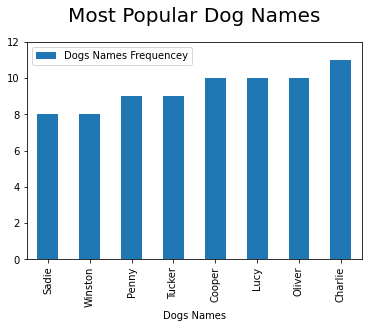

In [194]:
named_dogs = df.query('dog_name == dog_name')
named_dogs_grouped = named_dogs.groupby('dog_name').count()[['tweet_id']]
named_dogs_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
named_dogs_grouped.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=12)
plt.title("Most Popular Dog Names",{'fontsize': 20},pad=20)
plt.xlabel("Dogs Names")
plt.legend(["Dogs Names Frequencey"])

**As the graph, The dataset have many names like(Sadie,Wfnston,Pennt, Tucker,...).The most common name is Charlie**.

# Is there reationship between Retweet and  Likes?

Text(0.5, 1.0, 'Retweets and Likes Scatter Plot')

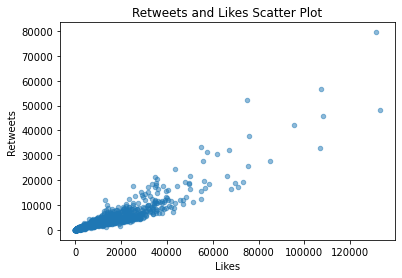

In [195]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')


As the graph result,there is a positive reationship between Retweet and  Likes.

# What is relationship between a numeric variable(favorite_count) and a categorical variable(dog_stage).

In [196]:
df.dog_stage

0       None
1       None
2       None
3       None
4       None
        ... 
1943    None
1944    None
1945    None
1946    None
1947    None
Name: dog_stage, Length: 1948, dtype: object

Text(0.5, 1.0, 'relationship between (favorite_count) and (dog_stage)')

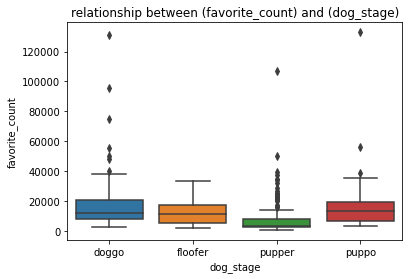

In [197]:
# Types dog_stage
dog_stage1 = ['doggo', 'floofer', 'pupper', 'puppo']

# Returns the types for dog_stage1 with the categories and orderedness

dog_stage = pd.api.types.CategoricalDtype(ordered=True, categories=dog_stage1)

# Use pandas.astype() to convert the "class1" column from a plain object type into an ordered categorical type 
df['dog_stage'] = df['dog_stage'].astype(dog_stage);

sb.boxplot(data=df, x='dog_stage', y='favorite_count')
plt.title('relationship between (favorite_count) and (dog_stage)')

**The dog_stage(Pupper) has the lowest number of like than the other.**

# How many dog types are there?

In [198]:
len(df.prediction.unique())

113

In [199]:
df.prediction.value_counts()

golden_retriever      153
Labrador_retriever    103
Pembroke               94
Chihuahua              89
pug                    62
                     ... 
EntleBucher             1
Irish_wolfhound         1
Japanese_spaniel        1
silky_terrier           1
Scotch_terrier          1
Name: prediction, Length: 112, dtype: int64

**There are 113 prediction type of dogs.**